# Importing the Libraries and Dataset

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time
from scipy.stats import entropy
from collections import Counter
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import brier_score_loss
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [18]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [19]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [20]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [21]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [22]:
from sklearn.preprocessing import MinMaxScaler # minmax scaler used to bring all the values to o t0 1
sclar=MinMaxScaler() 
x_small=sclar.fit_transform(x) #fit transform is used to get the values to specific scale
x_small

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_small,y,test_size=0.3,random_state=1)

In [24]:
#USER DEFINED FUNCTION TO DISPLAY THE CONFUSION MATRIX
def display(i):
 cm_disp=ConfusionMatrixDisplay(confusion_matrix=i,display_labels=['no diabetes','diabetes'])
 cm_disp.plot()

In [25]:
#USER DEFINED FUNCTION TO DISPLAY ROC-AUC PLOT
def plot_roc(y_test,probs):
  fpr,tpr,threshold=roc_curve(y_test,probs)
  roc_auc=auc(fpr,tpr)
  print('ROC AUC=%0.2f'%roc_auc)
  plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'b--')
  plt.xlim([0,1])
  plt.ylim([0,1.05])
  plt.xlabel('False Postive Rate')
  plt.ylabel('True Postive Rate')
  plt.show()

In [26]:
#USER DEFINED FUNCTION TO DISPLAY PRECISION-RECALL GRAPH
def show(y_test,y_predicted):
 precision, recall, _ = precision_recall_curve(y_test, y_predicted)
 disp = PrecisionRecallDisplay(precision=precision, recall=recall)
 disp.plot()

In [27]:
#USER DEFINED FUNCTION TO VISUALIZE THE CORRELATION AMONG DIFFERENT FEATURES IN THE DATASET
def heatmap(x,y,df):
  sns.heatmap(df.corr(),cmap="OrRd",annot=True)
  plt.figure(figsize=(5000,5000))
  plt.show()

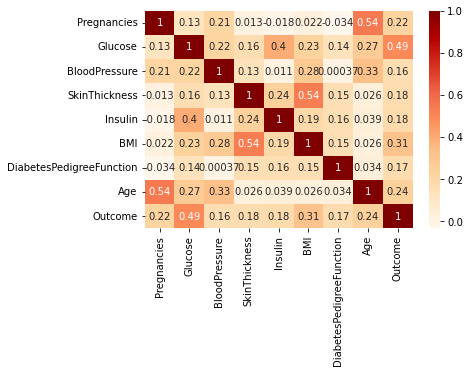

<Figure size 360000x360000 with 0 Axes>

In [29]:
heatmap(30,15,df)

In [30]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
neigh.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
start=time.time()
neigh.fit(X_train,y_train)
print("k-nn score : ",neigh.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

k-nn score :  0.7532467532467533
Time for Training: 0.0200498104095459


[[122  24]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       146
           1       0.68      0.61      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



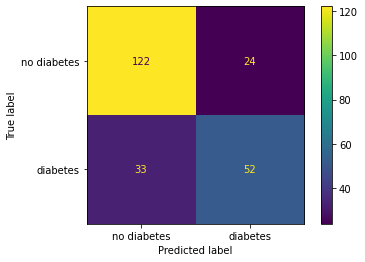

In [32]:
y_predicted=neigh.predict(X_test)
probs_neigh=neigh.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

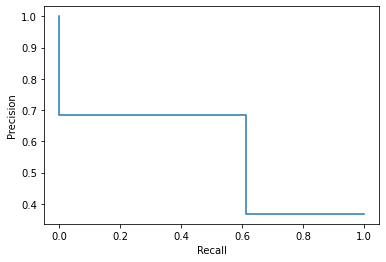

In [33]:
show(y_test,y_predicted)

In [34]:
print("No.of correctly classified samples for KNN Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for KNN Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score for KNN Classifier: ",brier_score_loss(y_test, probs_neigh))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for KNN Classifier is:  174
No.of wrongly classified samples for KNN Classifier is:  57
Brier score for KNN Classifier:  0.18710918710918714


ROC AUC=0.79


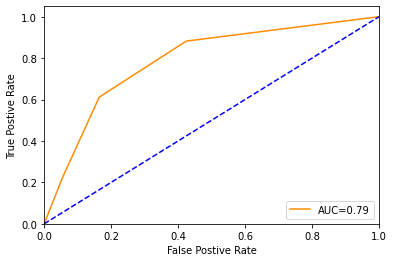

In [35]:
plot_roc(y_test,probs_neigh)

In [36]:
score=[]
for k in range(1,12):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train,y_train)
  score.append(neigh.score(X_test,y_test))


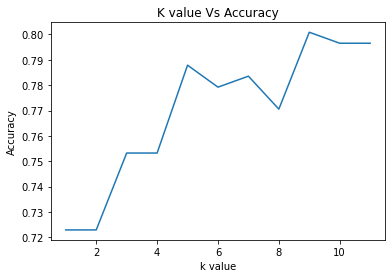

In [37]:
import matplotlib.pyplot as plt
k=[1,2,3,4,5,6,7,8,9,10,11]
plt.plot(k,score)
plt.title("K value Vs Accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()


In [42]:
#MLP CLASSIFIER
s=X_train
h=y_train
clf1 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(9, ), random_state=1)
clf1.fit(s, h)
clf1.predict(X_test)

C:\Users\mohan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [39]:
start=time.time()
clf1.fit(s,h) # to train the model of knn so  we are giving both input and output
print('MLP score:',clf1.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)

MLP score: 0.7748917748917749
Time for Training: 0.12524795532226562


C:\Users\mohan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[129  17]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



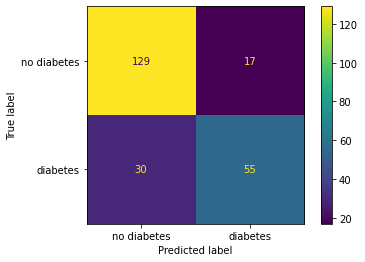

In [43]:
y_predicted=clf1.predict(X_test)
probs_mlp=clf1.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

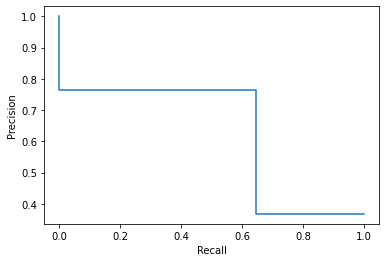

In [44]:
show(y_test,y_predicted)

In [45]:
print("No.of correctly classified samples for MLP Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for MLP Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score for MLP Classifier: ",brier_score_loss(y_test, probs_mlp))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for MLP Classifier is:  184
No.of wrongly classified samples for MLP Classifier is:  47
Brier score for MLP Classifier:  0.13587350476934468


ROC AUC=0.88


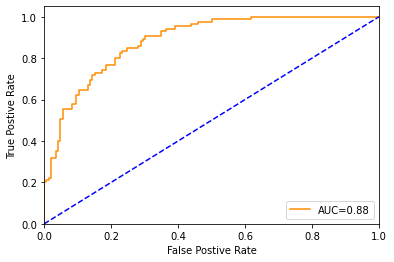

In [46]:
plot_roc(y_test,probs_mlp)

In [47]:
#SVM CLASSIFIER
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [48]:
clf=svm.SVC(kernel='linear') #kernel fn is linear here finding accuracy using different kernal fns
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for linear kernal:',clf.score(X_test,y_test)) #finding how accurate results are in testing set
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for linear kernal: 0.7835497835497836
Time for Training: 0.006079673767089844


[[127  19]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       146
           1       0.74      0.64      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



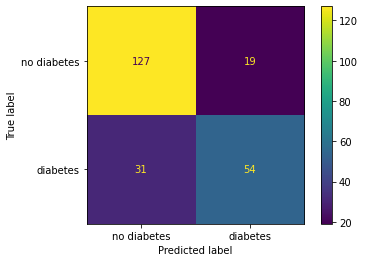

In [49]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

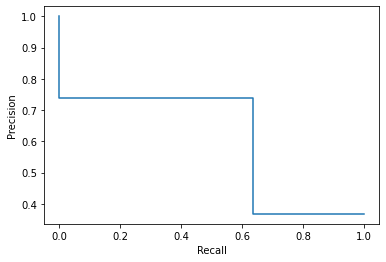

In [50]:
show(y_test,y_predicted)

In [51]:
print("No.of correctly classified samples for SVM Linear kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM Linear kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))

No.of correctly classified samples for SVM Linear kernel is:  181
No.of wrongly classified samples for SVM Linear kernel is:  50


In [52]:
clf=svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for poly kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for poly kernal: 0.8701298701298701
Time for Training: 0.0029997825622558594


[[136  10]
 [ 20  65]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       146
           1       0.87      0.76      0.81        85

    accuracy                           0.87       231
   macro avg       0.87      0.85      0.86       231
weighted avg       0.87      0.87      0.87       231



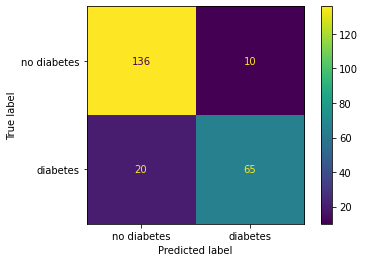

In [53]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [54]:
print("No.of correctly classified samples for SVM poly kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM poly kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))


No.of correctly classified samples for SVM poly kernel is:  201
No.of wrongly classified samples for SVM poly kernel is:  30


In [55]:
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for rbf kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for rbf kernal: 0.8528138528138528
Time for Training: 0.0074422359466552734


[[131  15]
 [ 19  66]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       146
           1       0.81      0.78      0.80        85

    accuracy                           0.85       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.85      0.85      0.85       231



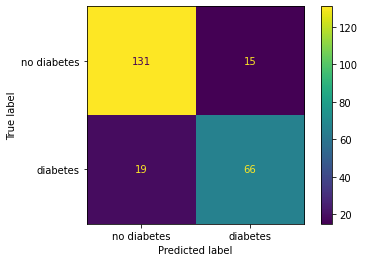

In [56]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [57]:
print("No.of correctly classified samples for SVM rbf kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM rbf kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))

No.of correctly classified samples for SVM rbf kernel is:  197
No.of wrongly classified samples for SVM rbf kernel is:  34


In [58]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for sigmoid kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for sigmoid kernal: 0.38095238095238093
Time for Training: 0.0051343441009521484


[[85 61]
 [82  3]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       146
           1       0.05      0.04      0.04        85

    accuracy                           0.38       231
   macro avg       0.28      0.31      0.29       231
weighted avg       0.34      0.38      0.36       231



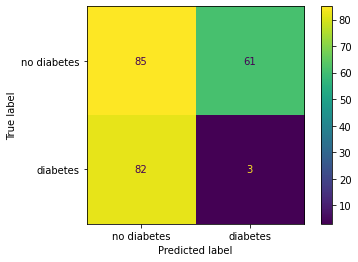

In [59]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [60]:
print("No.of correctly classified samples for SVM sigmoid kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM sigmoid kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))


No.of correctly classified samples for SVM sigmoid kernel is:  88
No.of wrongly classified samples for SVM sigmoid kernel is:  143


In [61]:
#Decision tree classifier
start=time.time()
model = DecisionTreeClassifier(max_depth=5) #max depth of tree should be 5
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

Tree Graph Classifier Score :  0.8379888268156425
Time for Training: 0.011384725570678711


[[123  23]
 [ 27  58]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.72      0.68      0.70        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



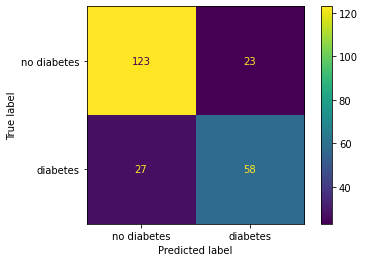

In [62]:
y_predicted=model.predict(X_test)
probs_tree=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

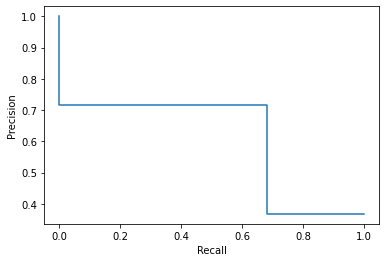

In [63]:
show(y_test,y_predicted)

In [64]:
print("No.of correctly classified samples for Decison tree Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Desicion tree Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_tree))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Decison tree Classifier is:  181
No.of wrongly classified samples for Desicion tree Classifier is:  50
Brier score:  0.15541790224530883


ROC AUC=0.84


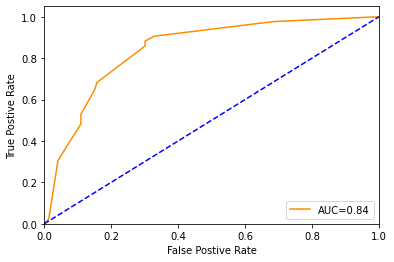

In [65]:
plot_roc(y_test,probs_tree)

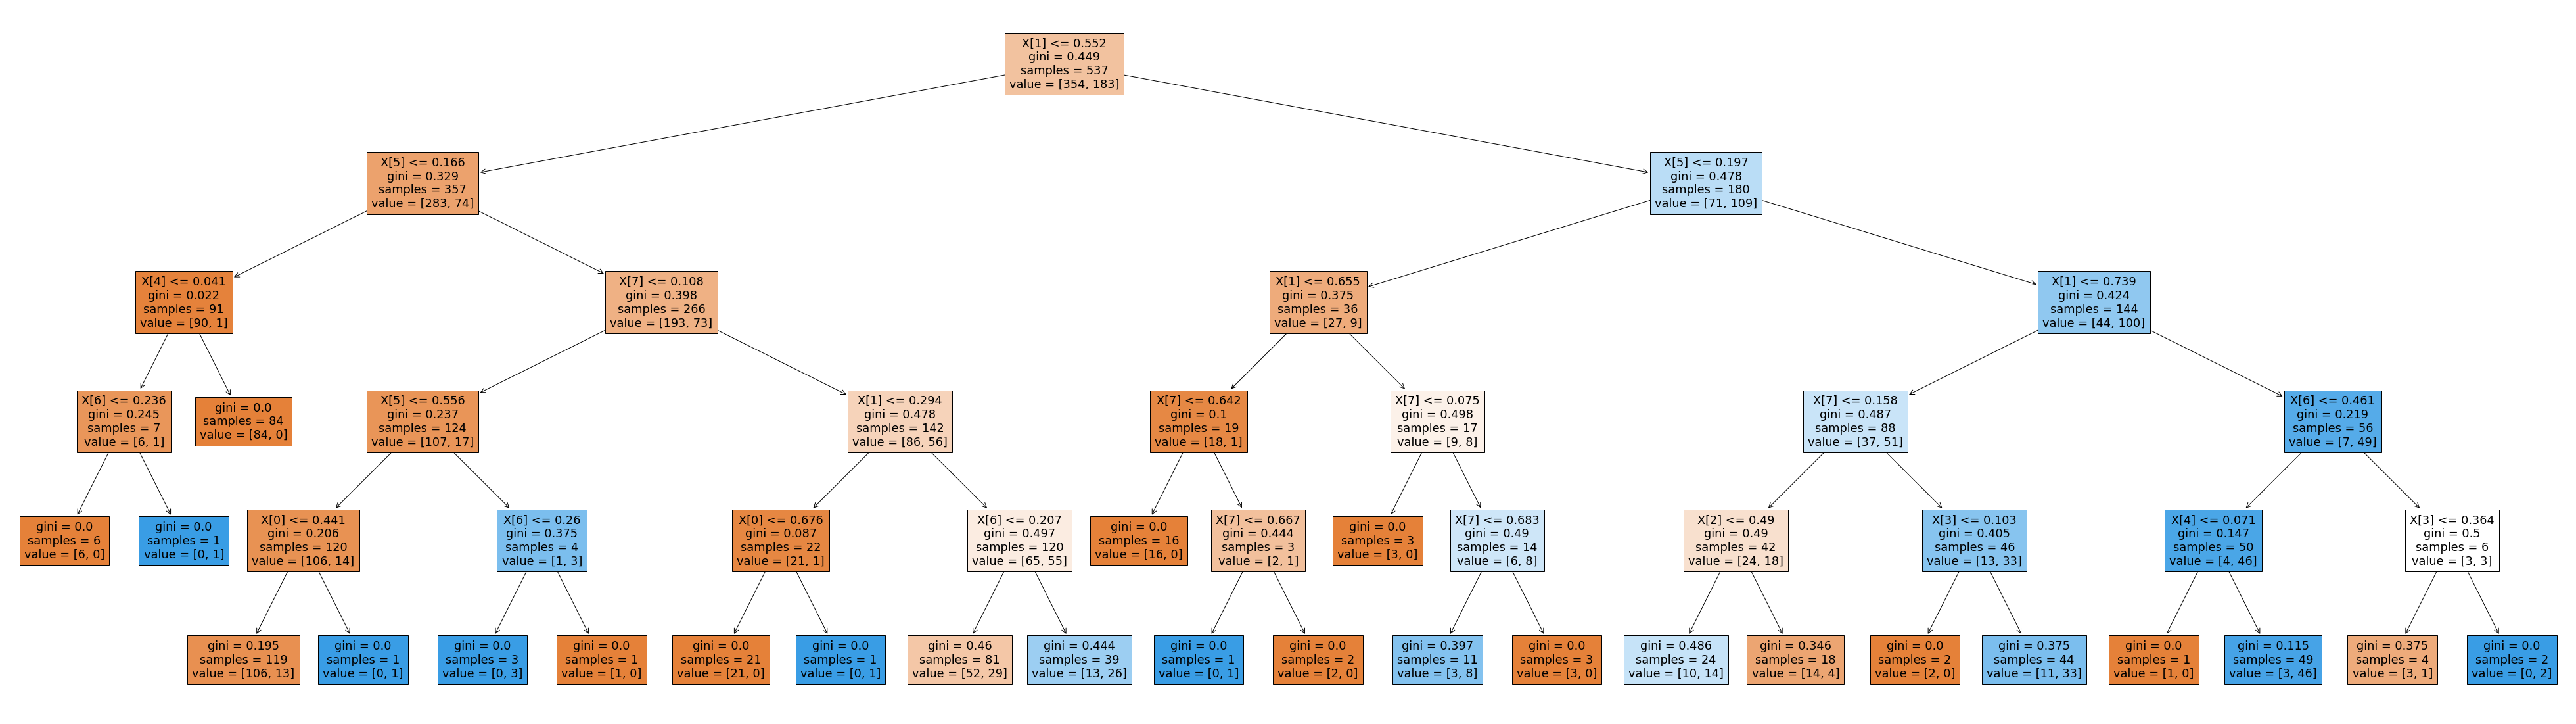

In [66]:
plt.figure(figsize=(70,20)) #fig length bredth
tree.plot_tree(model, filled=True) #plot tree is fn name to plot decision tree  all the values in the decision tree come from training data set given above
plt.show()

In [67]:
model = DecisionTreeClassifier(criterion="entropy") 
#saying that through entropy build tree
start=time.time()
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

Tree Graph Classifier Score :  1.0
Time for Training: 0.007283687591552734


[[113  33]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       146
           1       0.62      0.65      0.64        85

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



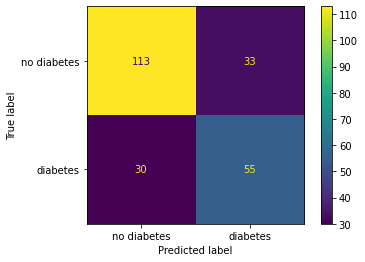

In [68]:
y_predicted=model.predict(X_test)
probs_tree=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

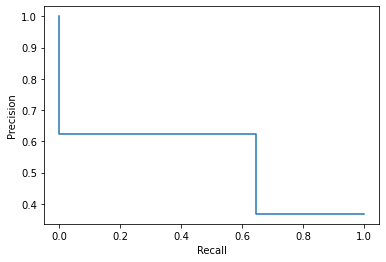

In [69]:
show(y_test,y_predicted)

In [70]:
print("No.of correctly classified samples for Decison tree Classifier(entropy based) is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Desicion tree Classifier(entropy based) is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_tree))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Decison tree Classifier(entropy based) is:  168
No.of wrongly classified samples for Desicion tree Classifier(entropy based) is:  63
Brier score:  0.2727272727272727


ROC AUC=0.71


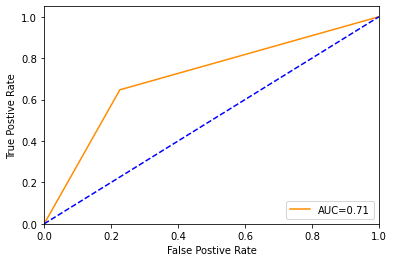

In [71]:
plot_roc(y_test,probs_tree)

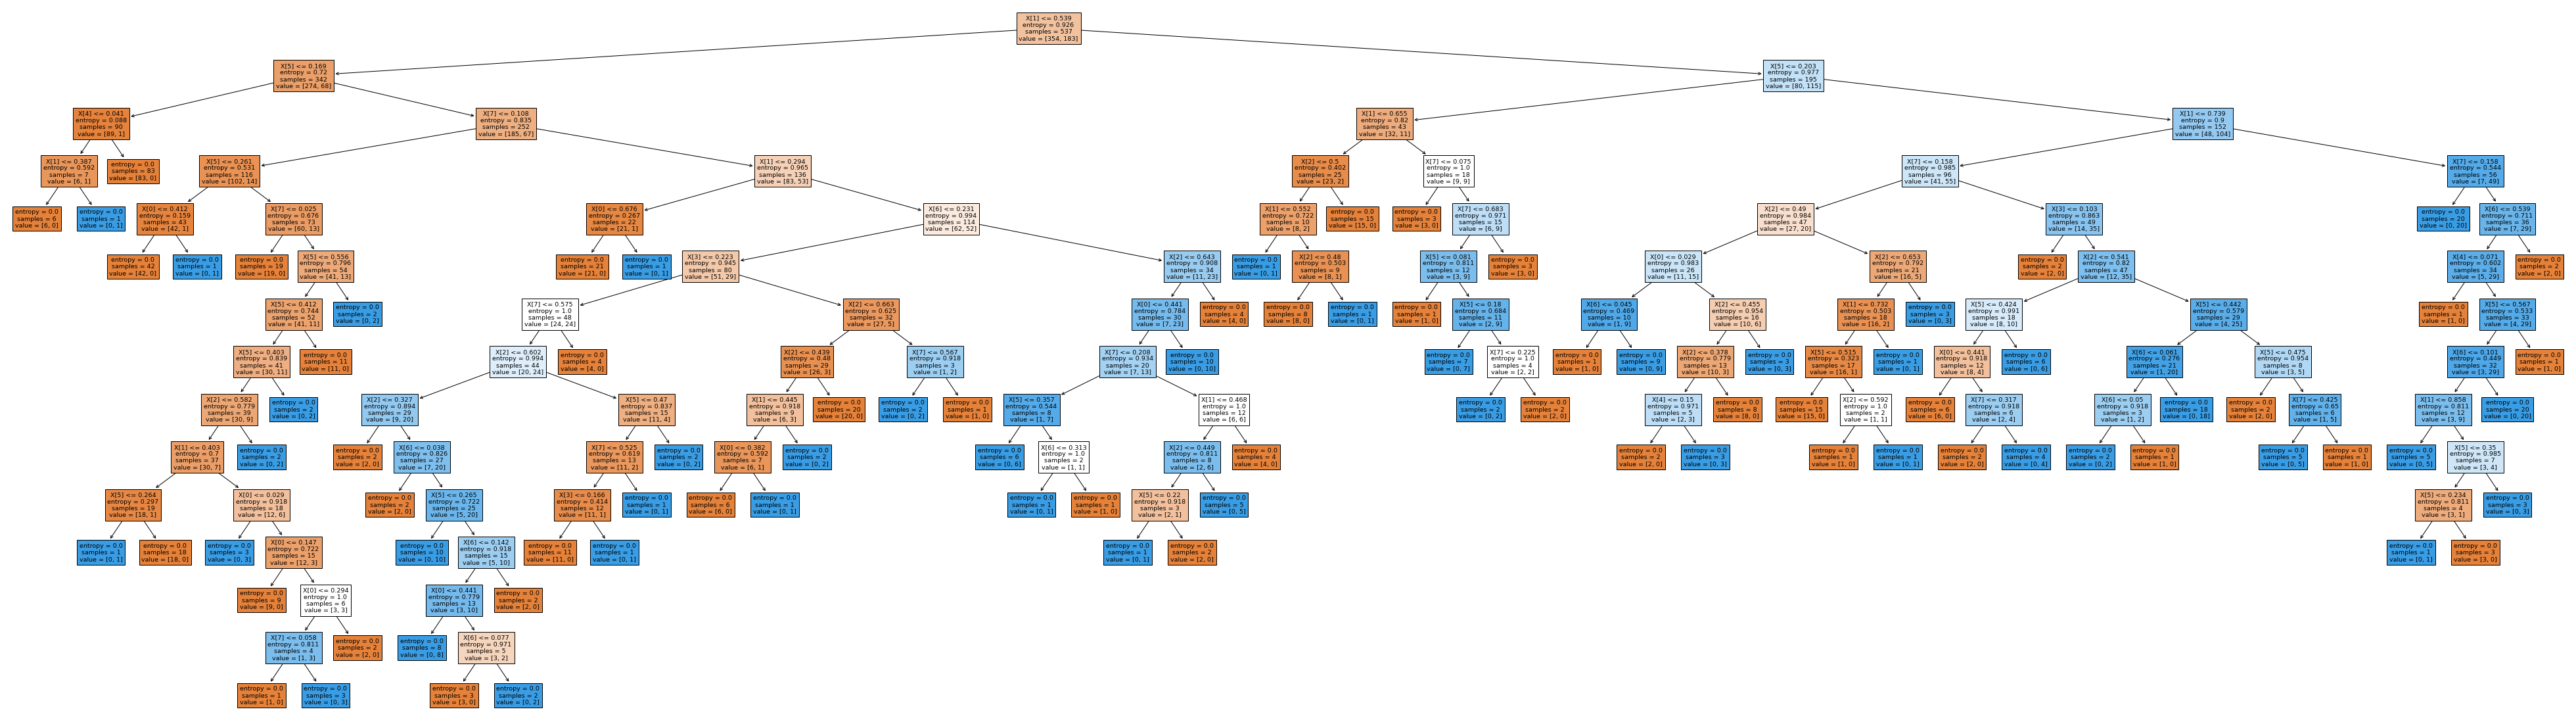

In [75]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [76]:
#Naive bayes CLASSIFIER
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
s=X_train
h=y_train
model.fit(s,h)
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [77]:
start=time.time()
model.fit(s,h) # to train the model of knn so  we are giving both input and output
print('Naive Bayes score:',model.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)

Naive Bayes score: 0.7705627705627706
Time for Training: 0.0033712387084960938


[[123  23]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.71      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



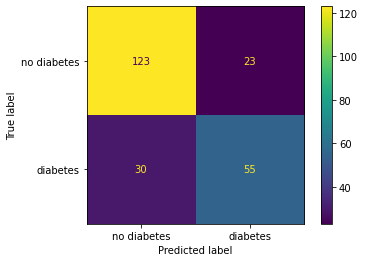

In [78]:
y_predicted=model.predict(X_test)
probs_nb=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [79]:
print("No.of correctly classified samples for Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_nb))#Mean squared difference between predicted probability and actual outcome

No.of correctly classified samples for Naive-Bayes Classifier is:  178
No.of wrongly classified samples for Naive-Bayes Classifier is:  53
Brier score:  0.16002561869014972


ROC AUC=0.85


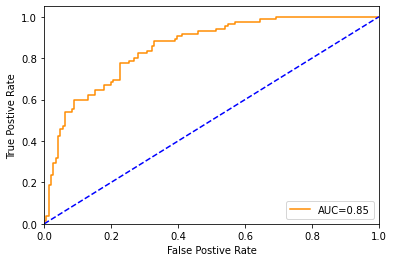

In [80]:
plot_roc(y_test,probs_nb)

Logistic Regression score: 0.7748917748917749
Time for Training: 0.022074222564697266
[[85 61]
 [82  3]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       146
           1       0.05      0.04      0.04        85

    accuracy                           0.38       231
   macro avg       0.28      0.31      0.29       231
weighted avg       0.34      0.38      0.36       231



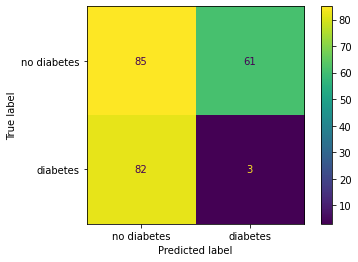

In [81]:
lr=LogisticRegression(random_state=2)
start=time.time()
lr.fit(X_train,y_train)
print('Logistic Regression score:',lr.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=clf.predict(X_test)
probs_lr=lr.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [82]:
print("No.of correctly classified samples for Logistic Regression Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Logistic Regression Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_lr))#Mean squared difference between predicted probability and actual outcome

No.of correctly classified samples for Logistic Regression Classifier is:  88
No.of wrongly classified samples for Logistic Regression Classifier is:  143
Brier score:  0.14594100446538383


ROC AUC=0.88


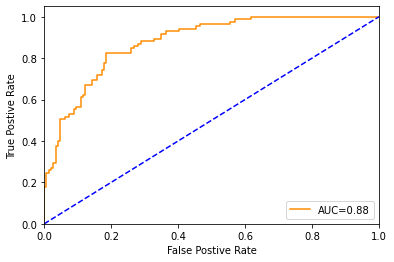

In [83]:
plot_roc(y_test,probs_lr)

Random Forest score: 0.7748917748917749
Time for Training: 0.45078325271606445
[[127  19]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       146
           1       0.74      0.64      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



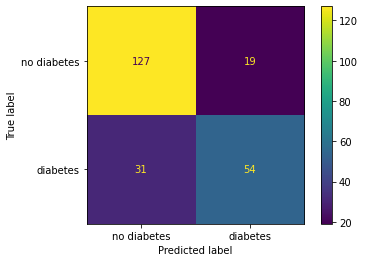

In [84]:
#Random Forest Classifier
rf=RandomForestClassifier()
start=time.time()
rf.fit(X_train,y_train)
print('Random Forest score:',lr.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=rf.predict(X_test)
probs_rf=rf.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

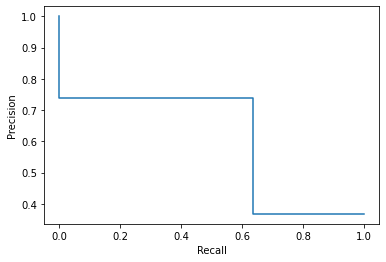

In [85]:
show(y_test,y_predicted)# Displays precision-recall graph

In [86]:
print("No.of correctly classified samples for Random Forest Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Random Forest Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_rf))#Mean squared difference between predicted probability and actual outcome

No.of correctly classified samples for Random Forest Classifier is:  181
No.of wrongly classified samples for Random Forest Classifier is:  50
Brier score:  0.14594588744588746


ROC AUC=0.87


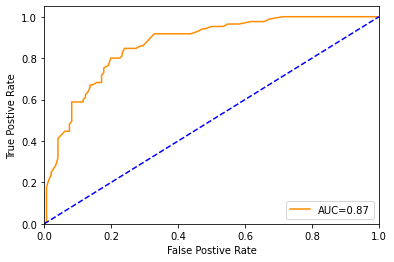

In [87]:
plot_roc(y_test,probs_rf)

Naive Bayes score:  0.7705627705627706
Time for Training: 0.0035448074340820312
[[123  23]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.71      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



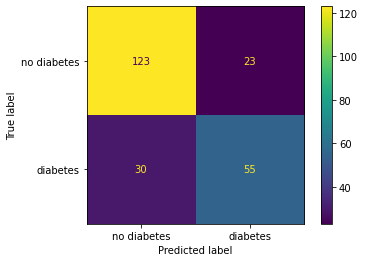

In [88]:
#GAUSSIAN NAIVE-BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
start=time.time()
g_nb.fit(X_train, y_train)
print("Naive Bayes score: ",g_nb.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=g_nb.predict(X_test)
probs_gnb=g_nb.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [89]:
print("No.of correctly classified samples for Gaussian Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Gaussian Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_gnb))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Gaussian Naive-Bayes Classifier is:  178
No.of wrongly classified samples for Gaussian Naive-Bayes Classifier is:  53
Brier score:  0.16002561869014972


ROC AUC=0.85


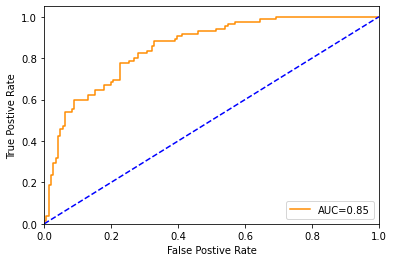

In [90]:
plot_roc(y_test,probs_gnb)

Bernouli Naive Bayes score:  0.6363636363636364
Time for Training: 0.006442546844482422
[[146   0]
 [ 84   1]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       146
           1       1.00      0.01      0.02        85

    accuracy                           0.64       231
   macro avg       0.82      0.51      0.40       231
weighted avg       0.77      0.64      0.50       231



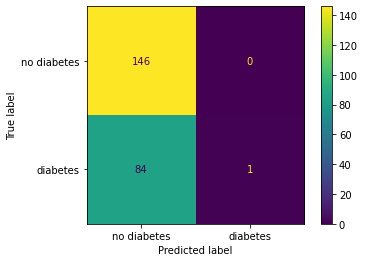

In [91]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
start=time.time()
bnb.fit(X_train, y_train)
print("Bernouli Naive Bayes score: ",bnb.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=bnb.predict(X_test)
probs_bnb=bnb.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [92]:
print("No.of correctly classified samples for Bernoulli Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Bernoulli Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_bnb))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Bernoulli Naive-Bayes Classifier is:  147
No.of wrongly classified samples for Bernoulli Naive-Bayes Classifier is:  84
Brier score:  0.22841523947472342


ROC AUC=0.52


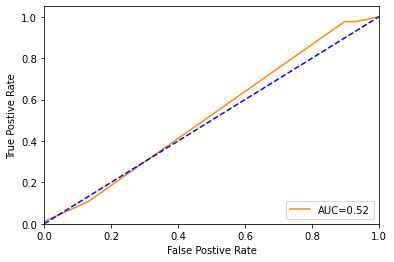

In [93]:
plot_roc(y_test,probs_bnb)

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
start=time.time()
regressor.fit(x, y) 
print("Random forest Regressor score: ",regressor.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=regressor.predict(X_test)

Random forest Regressor score:  -0.35808641418211073
Time for Training: 0.7942819595336914


AdaBoostClassifier score: 0.8230912476722533
Time for Training: 0.22354674339294434
[[127  19]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       146
           1       0.74      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.77       231



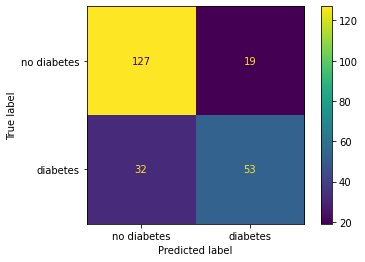

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
start=time.time()
model = abc.fit(X_train, y_train)
print("AdaBoostClassifier score:",abc.score(X_train, y_train))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=abc.predict(X_test)
probs_abc=abc.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [96]:
print("No.of correctly classified samples for AdaBoost Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for AdaBoost Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_abc))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for AdaBoost Classifier is:  180
No.of wrongly classified samples for AdaBoost Classifier is:  51
Brier score:  0.2282402117944638


ROC AUC=0.84


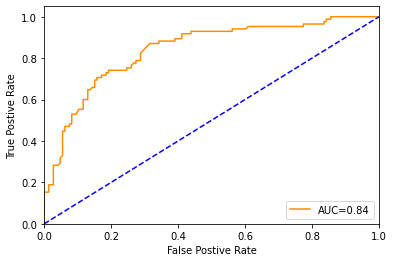

In [97]:
plot_roc(y_test,probs_abc)

 Multinomial naive Bayes score:  0.6320346320346321
Time for Training: 0.0030286312103271484
[[146   0]
 [ 85   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       146
           1       0.00      0.00      0.00        85

    accuracy                           0.63       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.40      0.63      0.49       231



C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


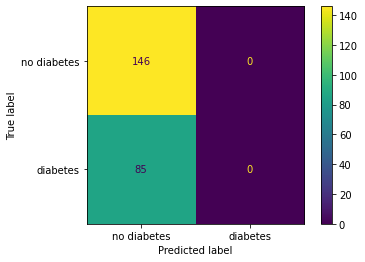

In [98]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
start=time.time()
clf.fit(X_train, y_train)
print(" Multinomial naive Bayes score: ",clf.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=clf.predict(X_test)
probs_clf=clf.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [99]:
print("No.of correctly classified samples for Multinomial Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Multinomial Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_clf))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Multinomial Naive-Bayes Classifier is:  146
No.of wrongly classified samples for Multinomial Naive-Bayes Classifier is:  85
Brier score:  0.22951001079424746


ROC AUC=0.73


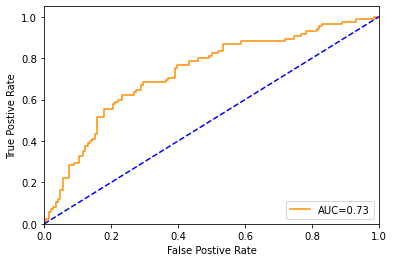

In [100]:
plot_roc(y_test,probs_clf)

Radius Neighbours Classifier score:  0.659217877094972
Time for Training: 0.03962445259094238
[[146   0]
 [ 85   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       146
           1       0.00      0.00      0.00        85

    accuracy                           0.63       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.40      0.63      0.49       231



C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


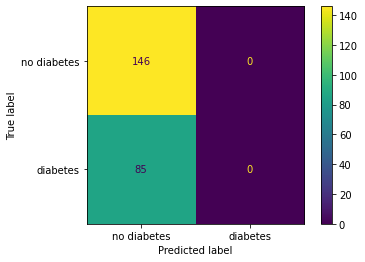

In [101]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=5.0)
start=time.time()
neigh.fit(X_train, y_train)
print("Radius Neighbours Classifier score: ",neigh.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=neigh.predict(X_test)
probs_neigh=neigh.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [102]:
print("No.of correctly classified samples for Radius Neighbours Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Radius Neighbours Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_neigh))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Radius Neighbours Classifier is:  146
No.of wrongly classified samples for Radius Neighbours Classifier is:  85
Brier score:  0.23330578475548985


ROC AUC=0.50


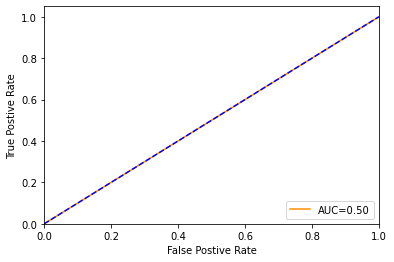

In [103]:
plot_roc(y_test,probs_neigh)

In [104]:
#LINEAR REGRESSION
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=linear_model.LinearRegression()
start=time.time()
reg.fit(X_train,y_train)
print("Linear Regression score : ",reg.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)
y_predicted=reg.predict(X_test)

Linear Regression score :  0.28947618362383465
Time taken :  0.04288840293884277


In [105]:
print("Coefficient : ",reg.coef_)
print("Mean square root : ",mean_squared_error(y_test,y_predicted))
print("r2 score : ",r2_score(y_test,y_predicted))

Coefficient :  [ 0.27492226  0.95245451 -0.20009162 -0.20939872 -0.13274738  0.89019842
  0.25091867  0.1797717 ]
Mean square root :  0.14282108598788643
r2 score :  0.38589234734894406


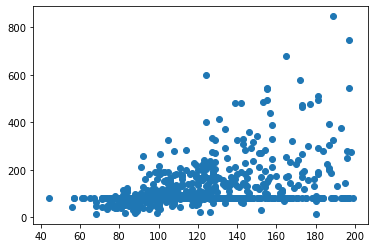

In [108]:
#K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.scatter(df['Glucose'],df['Insulin'])
plt.show()

In [107]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [111]:
y_predicted=km.fit_predict(df[['Glucose','Insulin']])
y_predicted

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1,

In [113]:
df['cluster']=y_predicted
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,2
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,1
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,1
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


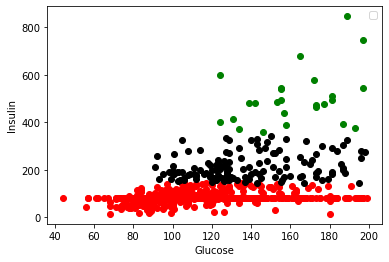

In [115]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Glucose,df1['Insulin'],color='green')
plt.scatter(df2.Glucose,df2['Insulin'],color='red')
plt.scatter(df3.Glucose,df3['Insulin'],color='black')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()

C:\Users\mohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


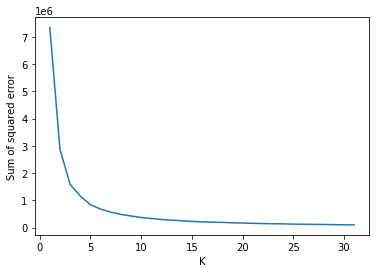

In [116]:
#ELBOW METHOD
k_range=range(1,32)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Glucose','Insulin']])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [117]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)

In [118]:
kfold = model_selection.KFold(n_splits = 3)

In [119]:
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 200
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,n_estimators = num_trees)

In [120]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [121]:
# Checking the Accuaracy of the model

acc = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :",acc.mean())

accuracy : 0.7318435754189944


In [122]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[128,  18],
       [ 30,  55]], dtype=int64)

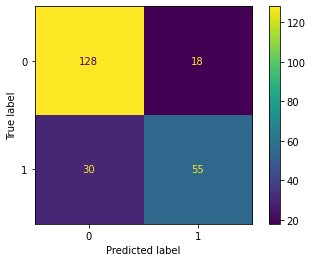

In [123]:
# Plotting the confusion Matrix


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.65      0.70        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



In [127]:
# Calculating F1 score
f1_score(y_test, y_pred, average='macro')

0.7691538974017322

In [128]:
import numpy as np
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.762
